In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
#importing necessary libraries 
!pip install pycaret -q 
import pandas as pd 
import numpy as np
import pycaret
import pandas as pd
from pycaret.regression import *
#warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['seaborn'])
from sklearn import set_config
set_config(display='text')

In [5]:
df= pd.read_csv("/kaggle/input/barc-intern-1/OdettedataML1.csv")
df

,Cu,Ni,Mn,P,C,Si,Temp,Fluence,DeltaYS
0,0.14,0.20,1.2,0.015,0.21,0.28,290,2.000000e+17,26.00
1,0.14,0.20,1.2,0.015,0.21,0.28,290,2.300000e+17,45.00
2,0.14,0.20,1.2,0.015,0.21,0.28,290,3.000000e+17,3.00
3,0.14,0.20,1.2,0.015,0.21,0.28,290,4.000000e+17,27.00
4,0.14,0.20,1.2,0.015,0.21,0.28,290,6.000000e+17,7.00
...,...,...,...,...,...,...,...,...,...
1545,0.06,0.62,1.3,0.009,0.08,0.37,290,1.570000e+19,43.00
1546,0.06,0.62,1.3,0.009,0.08,0.37,310,1.600000e+19,58.00
1547,0.06,0.62,1.3,0.009,0.08,0.37,270,1.710000e+19,53.00
1548,0.06,0.62,1.3,0.009,0.08,0.37,290,3.320000e+19,81.00


In [10]:
#dropping target column 
df1=df.drop('DeltaYS',axis=1)

In [11]:
#normalising the data for best fitting
df_norm = (df1-df1.min())/(df1.max()-df1.min())
df_norm = pd.concat((df_norm, df.DeltaYS),axis=1)

print("Scaled Dataset Using Pandas")
df_norm.head()

Scaled Dataset Using Pandas


,Cu,Ni,Mn,P,C,Si,Temp,Fluence,DeltaYS
0,0.162791,0.116959,0.704142,0.270833,0.617647,0.435484,0.5,0.000637,26.0
1,0.162791,0.116959,0.704142,0.270833,0.617647,0.435484,0.5,0.000773,45.0
2,0.162791,0.116959,0.704142,0.270833,0.617647,0.435484,0.5,0.001091,3.0
3,0.162791,0.116959,0.704142,0.270833,0.617647,0.435484,0.5,0.001546,27.0
4,0.162791,0.116959,0.704142,0.270833,0.617647,0.435484,0.5,0.002455,7.0


In [12]:
# setup the dataset
grid = setup(data=df_norm, target='DeltaYS',train_size=0.8, session_id =234)

,Description,Value
0,Session id,234
1,Target,DeltaYS
2,Target type,Regression
3,Original data shape,"(1550, 9)"
4,Transformed data shape,"(1550, 9)"
5,Transformed train set shape,"(1240, 9)"
6,Transformed test set shape,"(310, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [13]:
#getting the best model
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,9.2877,182.0159,13.2568,0.9668,0.3822,0.3108,0.6920
xgboost,Extreme Gradient Boosting,10.6251,246.4944,15.5163,0.9541,0.4173,0.3572,0.0480
lightgbm,Light Gradient Boosting Machine,10.7353,252.3073,15.6910,0.9532,0.3861,0.3277,18.6650
gbr,Gradient Boosting Regressor,12.7121,306.6485,17.4086,0.9428,0.4382,0.4007,0.0680
rf,Random Forest Regressor,12.3622,336.4835,18.1931,0.9369,0.4029,0.3696,0.2420
et,Extra Trees Regressor,13.0752,379.1460,19.3113,0.9289,0.4341,0.4015,0.1590
dt,Decision Tree Regressor,16.1762,573.0542,23.8376,0.8920,0.5155,0.4806,0.0180
knn,K Neighbors Regressor,20.7577,991.2842,31.0021,0.8191,0.5491,0.6553,0.0160
ada,AdaBoost Regressor,27.7489,1116.1263,33.3424,0.7886,0.7969,1.5232,0.0620
ridge,Ridge Regression,34.9394,2128.6073,46.0361,0.5890,0.8025,1.3928,0.0120


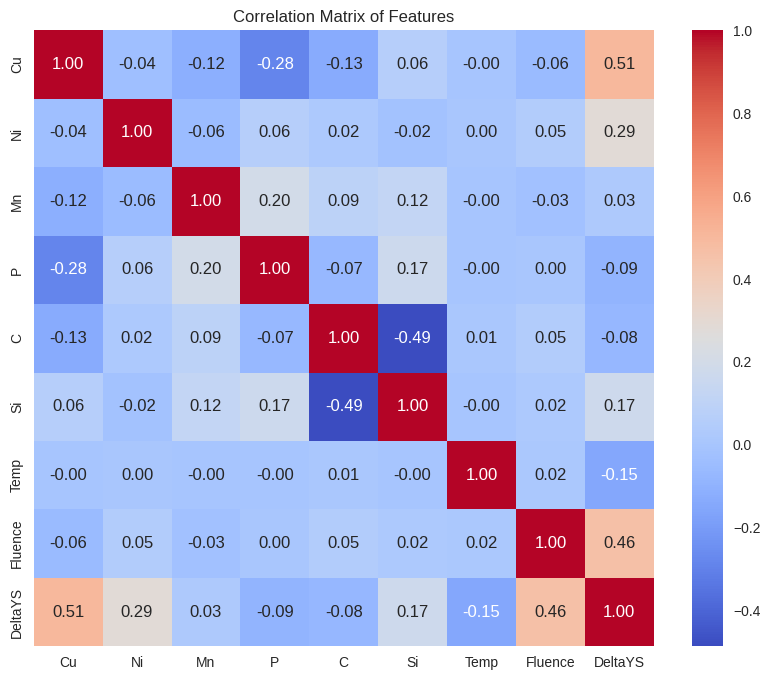

In [15]:
correlation_matrix = df.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

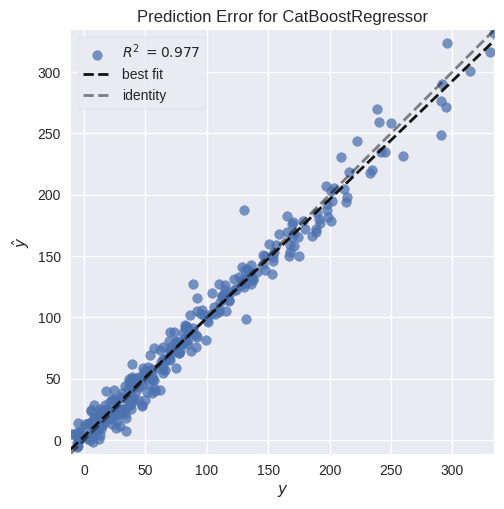

In [24]:
plot_model(best, plot = 'error')

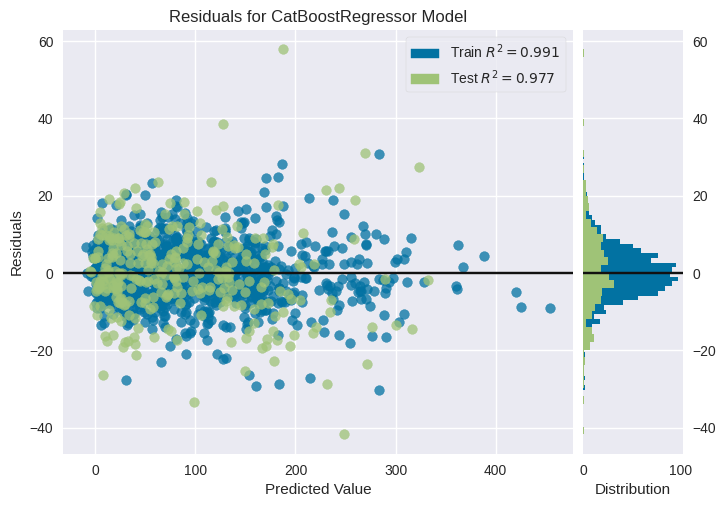

In [18]:
# plot residuals
plot_model(best, plot = 'residuals')

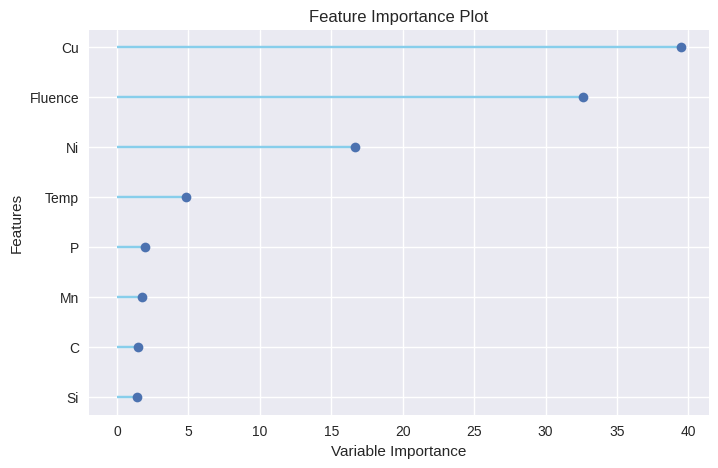

In [19]:
# plot feature importance
plot_model(best, plot = 'feature')

In [21]:
catboost = create_model("catboost")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,8.3247,120.6190,10.9827,0.9704,0.4082,0.2876
1,8.3019,124.7905,11.1710,0.9780,0.2708,0.2193
2,9.5006,200.4951,14.1596,0.9586,0.4272,0.3688
3,8.8750,156.0383,12.4915,0.9667,0.4174,0.2976
4,10.3635,242.3692,15.5682,0.9628,0.3713,0.2897
5,10.8205,247.3290,15.7267,0.9687,0.3424,0.2499
6,11.7625,339.4854,18.4251,0.9427,0.3702,0.2860
7,8.0758,107.5768,10.3719,0.9750,0.4481,0.3596
8,8.5758,159.7319,12.6385,0.9735,0.3769,0.3935


In [25]:
tuned_catboost = tune_model(catboost)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,8.6900,128.5211,11.3367,0.9684,0.3713,0.3076
1,9.8387,164.5878,12.8292,0.9710,0.3119,0.2570
2,9.7866,211.6766,14.5491,0.9563,0.4598,0.3810
3,9.3521,180.3229,13.4284,0.9616,0.4732,0.3022
4,11.5269,243.5173,15.6050,0.9626,0.4123,0.3110
5,11.9012,270.7131,16.4534,0.9657,0.3958,0.3179
6,12.7340,356.8094,18.8894,0.9398,0.4133,0.3106
7,9.1197,145.4459,12.0601,0.9662,0.4446,0.3524
8,9.4852,175.3309,13.2413,0.9709,0.3525,0.3426


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


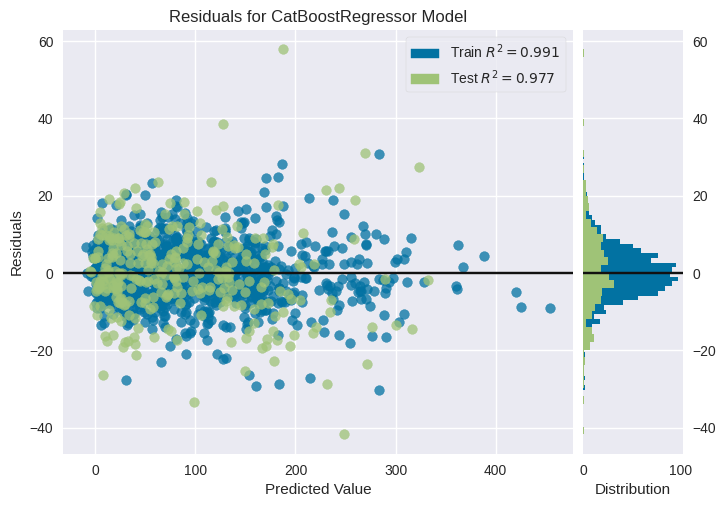

In [31]:
plot_model(catboost)